<a href="https://colab.research.google.com/github/chanduadabala1/Machine_learning/blob/main/Customer_Churn_Prediction_(Classic_ML_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully.
Shape: (7043, 21)
Missing values in TotalCharges: 11

--- Logistic Regression Evaluation ---
Accuracy: 0.7875
F1 Score: 0.5635

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



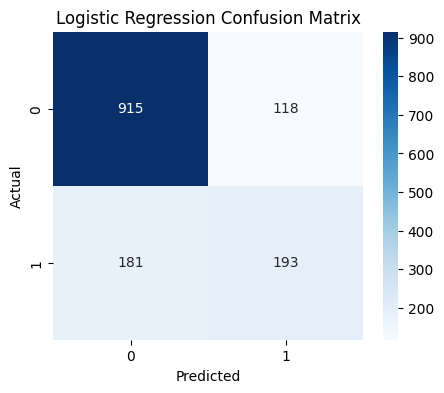


--- Random Forest Evaluation ---
Accuracy: 0.7854
F1 Score: 0.5410

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



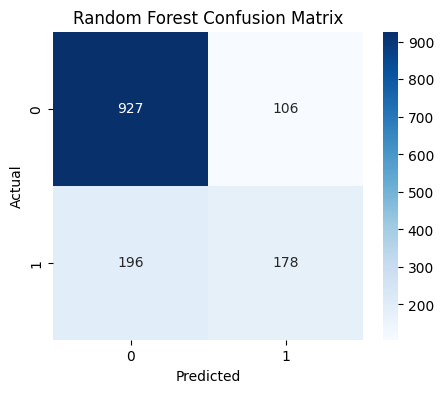


--- Feature Importance (Random Forest) ---


/tmp/ipython-input-1826295572.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


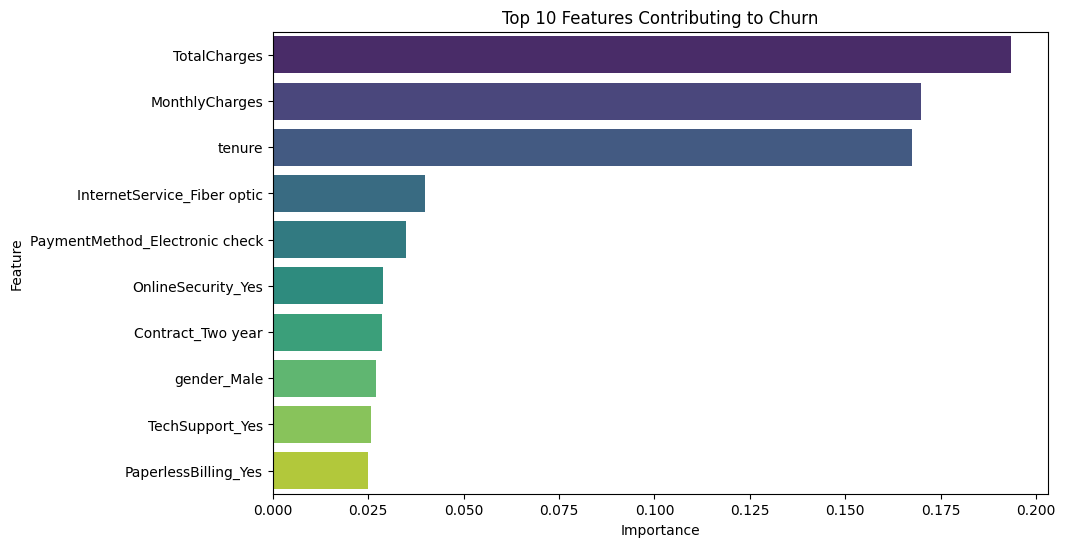

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# ---------------------------------------------------------
# 2. Load the Data
# ---------------------------------------------------------
# Ensure the filename matches what you uploaded to Colab
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("❌ File not found. Please upload the CSV to Colab files.")

# ---------------------------------------------------------
# 3. Data Cleaning & Preprocessing
# ---------------------------------------------------------

# A. Drop CustomerID (It's unique and has no predictive power)
df.drop(columns=['customerID'], inplace=True)

# B. Fix 'TotalCharges'
# It is often read as an object because of blank strings " ". We force it to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for nulls created by the conversion (usually very few) and drop them
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")
df.dropna(inplace=True)

# C. Encode Target Variable ('Churn')
# Map 'Yes' -> 1 and 'No' -> 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# D. Encode Categorical Features (One-Hot Encoding)
# This converts columns like 'Gender', 'Partner', 'InternetService' into numeric 0/1 columns
df = pd.get_dummies(df, drop_first=True)

# ---------------------------------------------------------
# 4. Splitting and Scaling
# ---------------------------------------------------------

# Define X (features) and y (target)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (Important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# 5. Model Training
# ---------------------------------------------------------

# Model A: Logistic Regression (Good baseline, easy to interpret)
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Model B: Random Forest (Better at capturing complex non-linear relationships)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Tree models don't strictly require scaling
y_pred_rf = rf_model.predict(X_test)

# ---------------------------------------------------------
# 6. Evaluation
# ---------------------------------------------------------

def print_evaluation(model_name, y_true, y_pred):
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print_evaluation("Logistic Regression", y_test, y_pred_log)
print_evaluation("Random Forest", y_test, y_pred_rf)

# ---------------------------------------------------------
# 7. Feature Importance (Random Forest)
# ---------------------------------------------------------

print("\n--- Feature Importance (Random Forest) ---")
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 10 Features Contributing to Churn')
plt.show()